## 0. Preperation

- Install latest version of SAHI and Torchvision:

In [2]:
!pip install -U git+https://github.com/obss/sahi
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/obss/sahi to /tmp/pip-req-build-k_n3e0yo
  Running command git clone --filter=blob:none --quiet https://github.com/obss/sahi /tmp/pip-req-build-k_n3e0yo
  Resolved https://github.com/obss/sahi to commit 26acb891168a6338f2b9c89b2f002ded968d6cb5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 15.6 MB/s eta 0:00:00
  Created wheel for sahi: filename=sahi-0.11.13-py3-none-any.whl size=101016 sha256=97f826c5014445197e442e682d38b799d255e9c47923f7eed04176f663336ccb
  Stored in directory: /tmp/pip-ephem-wheel-cache-e5q_uovv/wheels/f6/f1/7f/46317a48b38d6c773e5cd68876f8a4082a50b920536d5d6b92
  Created wheel

In [3]:
import os
os.getcwd()

'/content'

- Import required modules:

In [4]:
# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [5]:
# set torchvision FasterRCNN model
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

# download test images into demo_data folder
#download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
#download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

## 1. Standard Inference with a Torchvision Model

- Instantiate a torchvision model by defining model weight path, confing path and other parameters:

In [6]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='torchvision',
    model=model,
    confidence_threshold=0.5,
    image_size=640,
    device= "cuda:0"
 #   load_at_init=True,
)


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [7]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

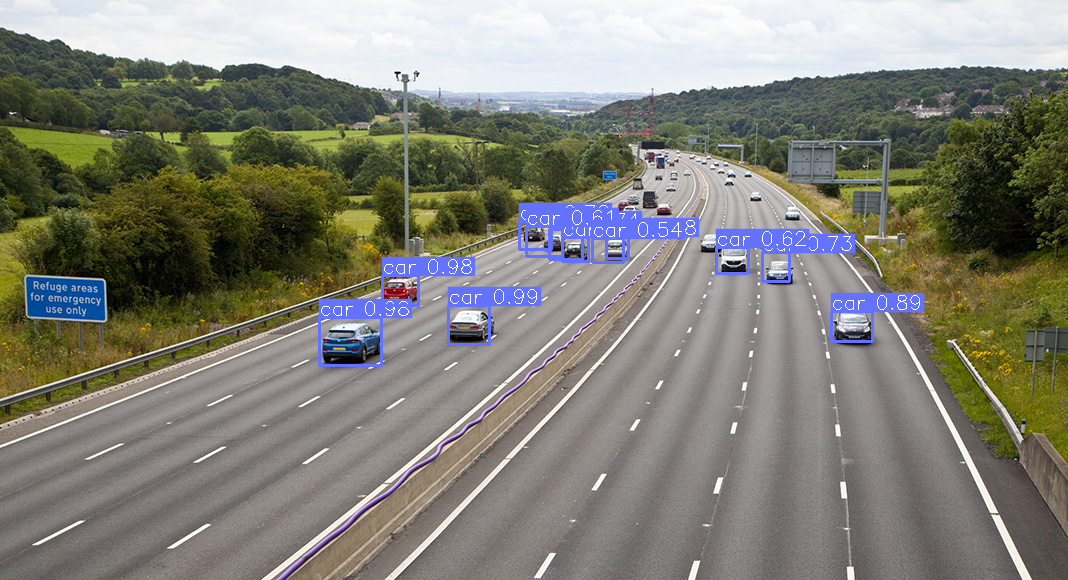

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a TorchVision Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 320,
    slice_width = 320,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 12 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

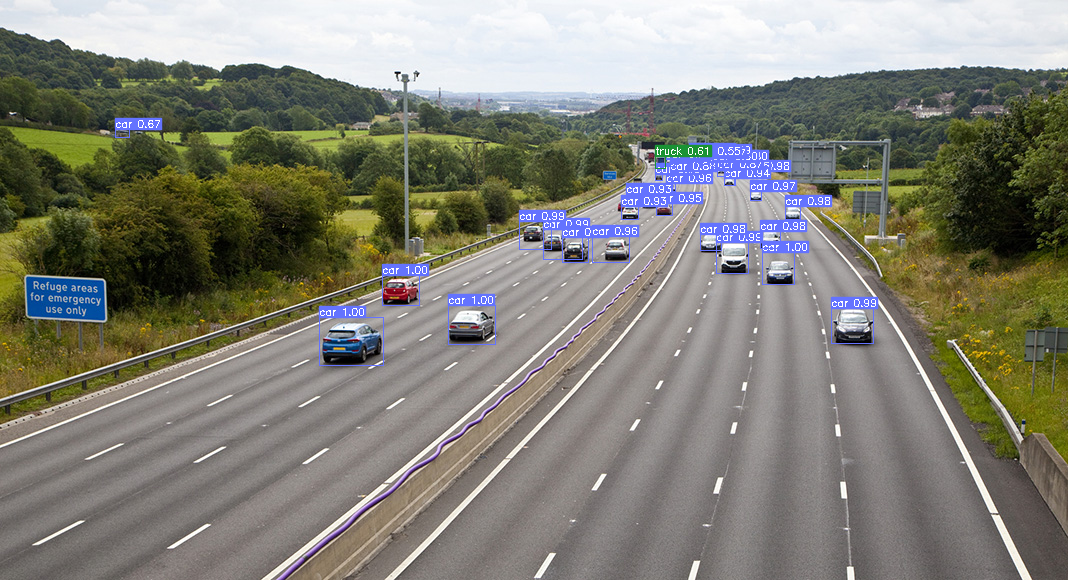

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(319, 317, 383, 365), w: 64, h: 48>,
    mask: None,
    score: PredictionScore: <value: 0.9990589022636414>,
    category: Category: <id: 3, name: car>>

In [ ]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [319, 317, 64, 48],
  'score': 0.9990589022636414,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 3072},
 {'image_id': None,
  'bbox': [448, 305, 47, 39],
  'score': 0.9988724589347839,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1833},
 {'image_id': None,
  'bbox': [762, 252, 32, 32],
  'score': 0.996906578540802,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1024}]

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [319, 317, 64, 48],
  'score': 0.9990589022636414,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 3072},
 {'image_id': 1,
  'bbox': [448, 305, 47, 39],
  'score': 0.9988724589347839,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1833},
 {'image_id': 1,
  'bbox': [762, 252, 32, 32],
  'score': 0.996906578540802,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1024}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install -U imantics

In [ ]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

In [7]:
import cv2
vidcap = cv2.VideoCapture('/content/2022-08-10_ППП-стоянки_кам-3_191356 (online-video-cutter.com).mp4')
success,image = vidcap.read()
count = 0
path = '/content/cutted'

while success:
  if count < 10:
    cv2.imwrite(os.path.join(path, "frame0%d.jpg" % count), image)
  else: cv2.imwrite(os.path.join(path, "frame%d.jpg" % count), image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1


Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

- Set model and directory parameters:

In [16]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
detection_model = AutoDetectionModel.from_pretrained(
    model_type='torchvision',
    model=model,
    confidence_threshold=0.7,
    image_size=640,
    device="cuda:0"
    #load_at_init=True,
)

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "/content/cutted"

- Perform sliced inference on given folder:

In [17]:
predict(
    detection_model=detection_model,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 51 listed files in folder: cutted/


Performing inference on images:   0%|          | 0/51 [00:00<?, ?it/s]

Performing prediction on 60 number of slices.


Performing inference on images:   0%|          | 0/51 [00:03<?, ?it/s]

Prediction time is: 3841.33 ms


Performing inference on images:   2%|▏         | 1/51 [00:04<03:25,  4.12s/it]

Performing prediction on 60 number of slices.


Performing inference on images:   4%|▍         | 2/51 [00:08<03:17,  4.03s/it]

Prediction time is: 3716.45 ms
Performing prediction on 60 number of slices.


Performing inference on images:   6%|▌         | 3/51 [00:12<03:11,  4.00s/it]

Prediction time is: 3755.78 ms


Performing inference on images:   6%|▌         | 3/51 [00:12<03:11,  4.00s/it]

Performing prediction on 60 number of slices.


Performing inference on images:   8%|▊         | 4/51 [00:15<03:06,  3.96s/it]

Prediction time is: 3715.19 ms
Performing prediction on 60 number of slices.


Performing inference on images:  10%|▉         | 5/51 [00:19<03:01,  3.94s/it]

Prediction time is: 3726.54 ms
Performing prediction on 60 number of slices.


Performing inference on images:  12%|█▏        | 6/51 [00:23<02:58,  3.97s/it]

Prediction time is: 3782.54 ms


Performing inference on images:  12%|█▏        | 6/51 [00:23<02:58,  3.97s/it]

Performing prediction on 60 number of slices.


Performing inference on images:  14%|█▎        | 7/51 [00:27<02:54,  3.96s/it]

Prediction time is: 3750.79 ms
Performing prediction on 60 number of slices.


Performing inference on images:  16%|█▌        | 8/51 [00:31<02:49,  3.94s/it]

Prediction time is: 3728.89 ms
Performing prediction on 60 number of slices.


Performing inference on images:  18%|█▊        | 9/51 [00:35<02:46,  3.96s/it]

Prediction time is: 3781.96 ms


Performing inference on images:  18%|█▊        | 9/51 [00:35<02:46,  3.96s/it]

Performing prediction on 60 number of slices.


Performing inference on images:  20%|█▉        | 10/51 [00:39<02:42,  3.97s/it]

Prediction time is: 3781.21 ms
Performing prediction on 60 number of slices.


Performing inference on images:  22%|██▏       | 11/51 [00:43<02:38,  3.95s/it]

Prediction time is: 3746.19 ms
Performing prediction on 60 number of slices.


Performing inference on images:  24%|██▎       | 12/51 [00:47<02:34,  3.96s/it]

Prediction time is: 3765.00 ms


Performing inference on images:  24%|██▎       | 12/51 [00:47<02:34,  3.96s/it]

Performing prediction on 60 number of slices.


Performing inference on images:  25%|██▌       | 13/51 [00:51<02:30,  3.96s/it]

Prediction time is: 3763.51 ms
Performing prediction on 60 number of slices.


Performing inference on images:  27%|██▋       | 14/51 [00:55<02:25,  3.94s/it]

Prediction time is: 3748.94 ms
Performing prediction on 60 number of slices.


Performing inference on images:  29%|██▉       | 15/51 [00:59<02:22,  3.97s/it]

Prediction time is: 3811.13 ms


Performing inference on images:  29%|██▉       | 15/51 [00:59<02:22,  3.97s/it]

Performing prediction on 60 number of slices.


Performing inference on images:  31%|███▏      | 16/51 [01:03<02:19,  3.98s/it]

Prediction time is: 3808.69 ms
Performing prediction on 60 number of slices.


Performing inference on images:  33%|███▎      | 17/51 [01:07<02:14,  3.96s/it]

Prediction time is: 3757.59 ms
Performing prediction on 60 number of slices.


Performing inference on images:  35%|███▌      | 18/51 [01:11<02:11,  3.99s/it]

Prediction time is: 3821.11 ms


Performing inference on images:  35%|███▌      | 18/51 [01:11<02:11,  3.99s/it]

Performing prediction on 60 number of slices.


Performing inference on images:  37%|███▋      | 19/51 [01:15<02:07,  4.00s/it]

Prediction time is: 3830.29 ms
Performing prediction on 60 number of slices.


Performing inference on images:  39%|███▉      | 20/51 [01:19<02:03,  3.98s/it]

Prediction time is: 3777.49 ms
Performing prediction on 60 number of slices.


Performing inference on images:  41%|████      | 21/51 [01:23<01:59,  3.98s/it]

Prediction time is: 3763.59 ms


Performing inference on images:  41%|████      | 21/51 [01:23<01:59,  3.98s/it]

Performing prediction on 60 number of slices.


Performing inference on images:  43%|████▎     | 22/51 [01:27<01:55,  3.99s/it]

Prediction time is: 3828.71 ms
Performing prediction on 60 number of slices.


Performing inference on images:  45%|████▌     | 23/51 [01:31<01:51,  3.97s/it]

Prediction time is: 3736.20 ms
Performing prediction on 60 number of slices.


Performing inference on images:  47%|████▋     | 24/51 [01:35<01:46,  3.96s/it]

Prediction time is: 3742.01 ms


Performing inference on images:  47%|████▋     | 24/51 [01:35<01:46,  3.96s/it]

Performing prediction on 60 number of slices.


Performing inference on images:  49%|████▉     | 25/51 [01:39<01:43,  3.98s/it]

Prediction time is: 3813.38 ms
Performing prediction on 60 number of slices.


Performing inference on images:  51%|█████     | 26/51 [01:43<01:39,  3.97s/it]

Prediction time is: 3762.63 ms
Performing prediction on 60 number of slices.


Performing inference on images:  53%|█████▎    | 27/51 [01:47<01:34,  3.95s/it]

Prediction time is: 3741.40 ms
Performing prediction on 60 number of slices.


Performing inference on images:  55%|█████▍    | 28/51 [01:51<01:31,  3.96s/it]

Prediction time is: 3805.62 ms
Performing prediction on 60 number of slices.


Performing inference on images:  57%|█████▋    | 29/51 [01:55<01:26,  3.95s/it]

Prediction time is: 3738.56 ms
Performing prediction on 60 number of slices.


Performing inference on images:  59%|█████▉    | 30/51 [01:59<01:22,  3.93s/it]

Prediction time is: 3725.44 ms
Performing prediction on 60 number of slices.


Performing inference on images:  61%|██████    | 31/51 [02:03<01:19,  3.96s/it]

Prediction time is: 3854.22 ms
Performing prediction on 60 number of slices.


Performing inference on images:  63%|██████▎   | 32/51 [02:07<01:15,  3.98s/it]

Prediction time is: 3840.80 ms
Performing prediction on 60 number of slices.


Performing inference on images:  65%|██████▍   | 33/51 [02:10<01:11,  3.95s/it]

Prediction time is: 3719.86 ms
Performing prediction on 60 number of slices.


Performing inference on images:  67%|██████▋   | 34/51 [02:14<01:07,  3.96s/it]

Prediction time is: 3807.14 ms
Performing prediction on 60 number of slices.


Performing inference on images:  69%|██████▊   | 35/51 [02:18<01:03,  3.94s/it]

Prediction time is: 3737.76 ms
Performing prediction on 60 number of slices.


Performing inference on images:  71%|███████   | 36/51 [02:22<00:58,  3.93s/it]

Prediction time is: 3736.57 ms
Performing prediction on 60 number of slices.


Performing inference on images:  73%|███████▎  | 37/51 [02:26<00:55,  3.96s/it]

Prediction time is: 3850.35 ms
Performing prediction on 60 number of slices.


Performing inference on images:  75%|███████▍  | 38/51 [02:30<00:51,  3.95s/it]

Prediction time is: 3757.99 ms
Performing prediction on 60 number of slices.


Performing inference on images:  76%|███████▋  | 39/51 [02:34<00:47,  3.93s/it]

Prediction time is: 3727.29 ms
Performing prediction on 60 number of slices.


Performing inference on images:  78%|███████▊  | 40/51 [02:38<00:43,  3.96s/it]

Prediction time is: 3853.47 ms
Performing prediction on 60 number of slices.


Performing inference on images:  80%|████████  | 41/51 [02:42<00:39,  3.95s/it]

Prediction time is: 3755.30 ms
Performing prediction on 60 number of slices.


Performing inference on images:  82%|████████▏ | 42/51 [02:46<00:35,  3.94s/it]

Prediction time is: 3748.25 ms
Performing prediction on 60 number of slices.


Performing inference on images:  84%|████████▍ | 43/51 [02:50<00:31,  3.95s/it]

Prediction time is: 3828.61 ms
Performing prediction on 60 number of slices.


Performing inference on images:  86%|████████▋ | 44/51 [02:54<00:27,  3.93s/it]

Prediction time is: 3724.79 ms
Performing prediction on 60 number of slices.


Performing inference on images:  88%|████████▊ | 45/51 [02:58<00:23,  3.93s/it]

Prediction time is: 3752.51 ms
Performing prediction on 60 number of slices.


Performing inference on images:  90%|█████████ | 46/51 [03:02<00:19,  3.96s/it]

Prediction time is: 3855.16 ms
Performing prediction on 60 number of slices.


Performing inference on images:  92%|█████████▏| 47/51 [03:06<00:15,  3.95s/it]

Prediction time is: 3739.79 ms
Performing prediction on 60 number of slices.


Performing inference on images:  94%|█████████▍| 48/51 [03:10<00:11,  3.94s/it]

Prediction time is: 3745.62 ms
Performing prediction on 60 number of slices.


Performing inference on images:  96%|█████████▌| 49/51 [03:14<00:07,  3.96s/it]

Prediction time is: 3831.44 ms
Performing prediction on 60 number of slices.


Performing inference on images:  98%|█████████▊| 50/51 [03:18<00:03,  3.95s/it]

Prediction time is: 3746.00 ms
Performing prediction on 60 number of slices.


Performing inference on images: 100%|██████████| 51/51 [03:21<00:00,  3.96s/it]

Prediction time is: 3739.27 ms
Prediction results are successfully exported to runs/predict/exp2


In [18]:
image_folder = '/content/runs/predict/exp2/visuals'
file_list = os.listdir(image_folder)

#grab last 2 characters of the file name:
def last_2chars(x):
    return(x[5:7])

srtd = sorted(file_list, key = last_2chars)

In [20]:

video_name = 'torchvision_video2.avi'

images = [img for img in srtd if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 24, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()